In [1]:
class Field:
    def __init__(self, size, item_pickup, item_dropoff, start_position):
        self.size = size
        self.item_pickup = item_pickup
        self.item_dropoff = item_dropoff
        self.position = start_position
        self.item_in_car = False

    def get_number_of_states(self):
        return self.size*self.size*self.size*self.size*2


    def get_state(self):
        state = self.position[0]*self.size*self.size*self.size*2
        state = state + self.position[1]*self.size*self.size*2
        state = state + self.item_pickup[0]*self.size*2
        state = state + self.item_pickup[1]*2

        if self.item_in_car:
            state = state + 1
        return state

    def make_action(self, action):
        (x,y) = self.position
        if action == 0: #down
            if y == self.size-1:
                return -10, False
            else:
                self.position = (x, y+1)
                return -1, False

        elif action == 1: #up
            if y == 0:
                return -10, False
            else:
                self.position = (x, y-1)
                return -1, False

        elif action == 2: #left
            if x == 0:
                return -10, False
            else:
                self.position = (x-1, y)
                return -1, False

        elif action == 3: #right
            if x == self.size-1:
                return -10, False
            else:
                self.position = (x+1, y)
                return -1, False

        elif action == 4: # pickup
            if self.item_in_car:
                return -10, False
            elif self.item_pickup != (x,y):
                return -10, False
            else:
                self.item_in_car = True
                return 20, False

        elif action == 5: #dropoff
            if not self.item_in_car:
                return -10, False
            elif self.item_dropoff != (x,y):
                self.item_pickup = (x,y)
                self.item_in_car = False
                return -10, False
            else:
                self.item_in_car = False
                return 20, True

In [2]:
size = 10
item_pickup = (0,0)
item_dropoff = (9,9)
start_position = (9,0)

field = Field(size, item_pickup, item_dropoff, start_position)

In [3]:
field.position

(9, 0)

## Lets hand code the perfect solution - 29 steps

In [4]:
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)

field.make_action(4)

field.make_action(0)
field.make_action(0)
field.make_action(0)
field.make_action(0)
field.make_action(0)
field.make_action(0)
field.make_action(0)
field.make_action(0)
field.make_action(0)

field.make_action(3)
field.make_action(3)
field.make_action(3)
field.make_action(3)
field.make_action(3)
field.make_action(3)
field.make_action(3)
field.make_action(3)
field.make_action(3)

field.make_action(5)

(20, True)

In [5]:
import random

In [6]:
# Random Solution
def random_solution():
    size = 10
    item_pickup = (0,0)
    item_dropoff = (9,9)
    start_position = (9,0)

    field = Field(size, item_pickup, item_dropoff, start_position)

    done = False
    steps = 0

    while not done:
        action = random.randint(0,5)
        reward, done = field.make_action(action)
        steps = steps + 1

    return steps


In [7]:
random_solution()

36249

In [8]:
run = [random_solution() for _ in range(100)]

In [9]:
sum(run)/len(run)

150745.73

In [10]:
# Q-Learning Algo
import numpy as np

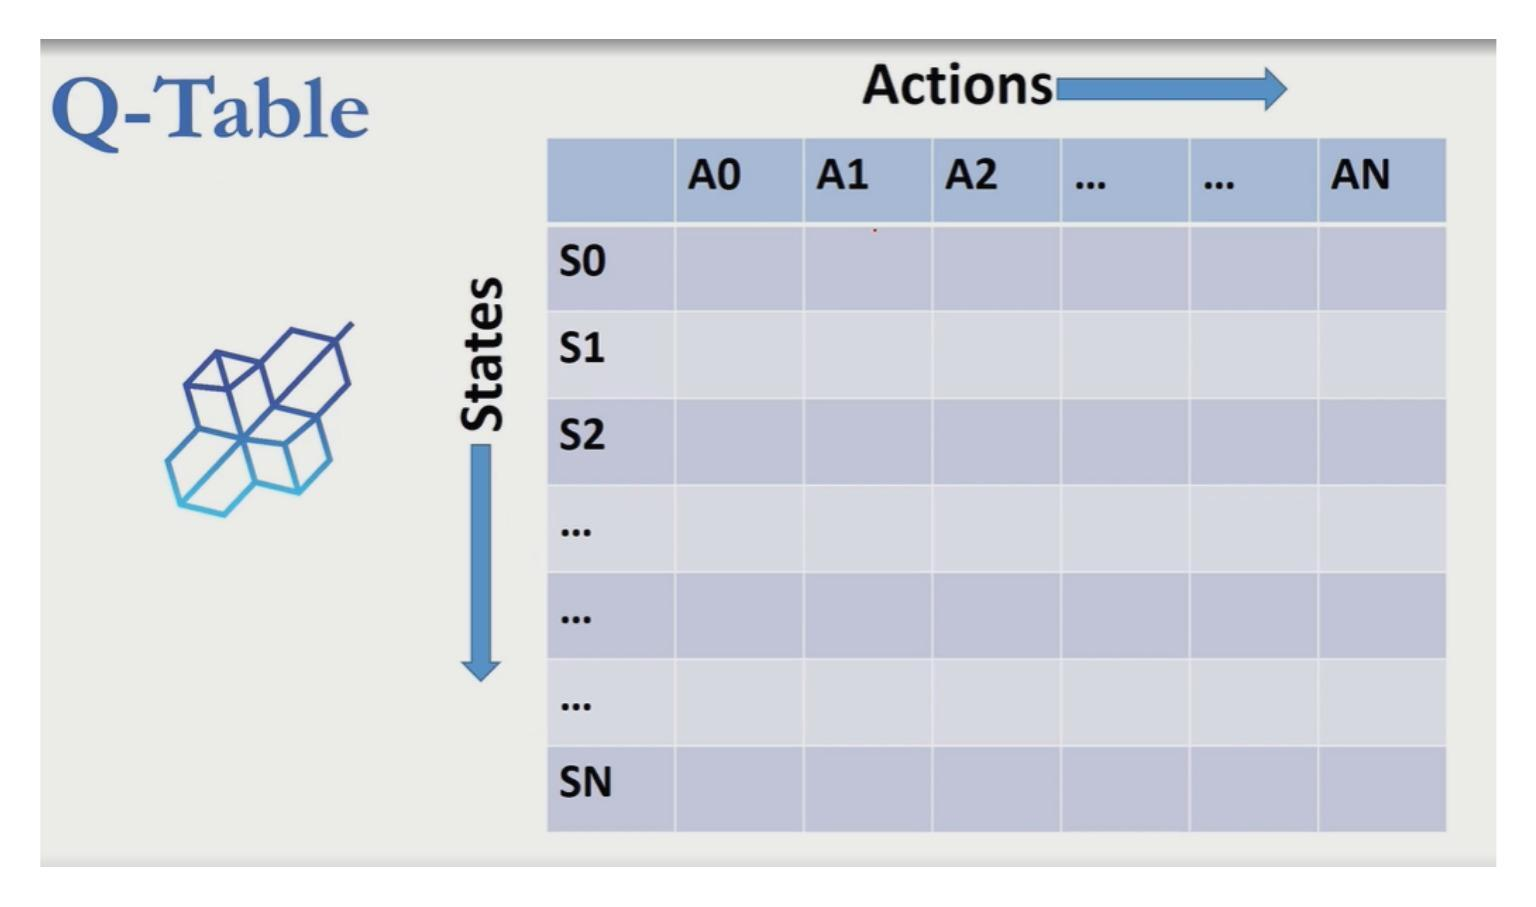

In [18]:
size = 10
item_pickup = (0,0)
item_dropoff = (9,9)
start_position = (9,0)

field = Field(size, item_pickup, item_dropoff, start_position)

number_of_states = field.get_number_of_states()
number_of_actions = 6

q_table = np.zeros((number_of_states, number_of_actions))

epsilon = 0.1
alpha = 0.1
gamma = 0.6

for _ in range(10000):
    field = Field(size, item_pickup, item_dropoff, start_position)
    done = False

    while not done:
        state = field.get_state()
        if random.uniform(0,1) < epsilon:
            action = random.randint(0,5) #Explore
        else:
            action = np.argmax(q_table[state]) #Exploit

        reward, done = field.make_action(action)

        new_state = field.get_state()
        new_state_max = np.max(q_table[new_state])

        q_table[state, action] = (1-alpha)*q_table[state, action]+alpha*(reward+gamma*new_state_max - q_table[state, action])


In [23]:
def reinforcement_solution():
    epsilon = 0 #0.1  NOTE SETTING T0 0 if we have completed our learning for this is just a waste
    alpha = 0.1
    gamma = 0.6

    field = Field(size, item_pickup, item_dropoff, start_position)
    done = False
    steps = 0

    while not done:
        state = field.get_state()
        if random.uniform(0,1) < epsilon:
            action = random.randint(0,5) #Explore
        else:
            action = np.argmax(q_table[state]) #Exploit

        reward, done = field.make_action(action)

        new_state = field.get_state()
        new_state_max = np.max(q_table[new_state])

        q_table[state, action] = (1-alpha)*q_table[state, action]+alpha*(reward+gamma*new_state_max - q_table[state, action])

        steps = steps +1

    return steps

In [24]:
reinforcement_solution()

29

In [25]:
run = [reinforcement_solution() for _ in range(100)]

In [26]:
sum(run)/len(run)

29.0